In [1]:
import os
import sys
import random

import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Flatten, Reshape

sys.path.insert(0, os.path.abspath(os.path.join("..", "src")))
from utils import read_filenames
from processing import find_bounding_boxes, extract_and_resize, process_image, load_image

In [2]:
path = '/Users/michal/Documents/studia/sem4/WdUM/Galaxies_Clusterization/data/images'
#path = '/Users/julia/Desktop/semestr-4/ml/projekty/projekt-2/galaxies_data/images_gz2/images'
os.chdir(path)

galaxies = read_filenames(path)

In [3]:
galaxies = galaxies[:100000]
galaxies_train, galaxies_test = train_test_split(galaxies, test_size=0.2, random_state=21)
galaxies_train, galaxies_val = train_test_split(galaxies_train, test_size=0.2, random_state=21)

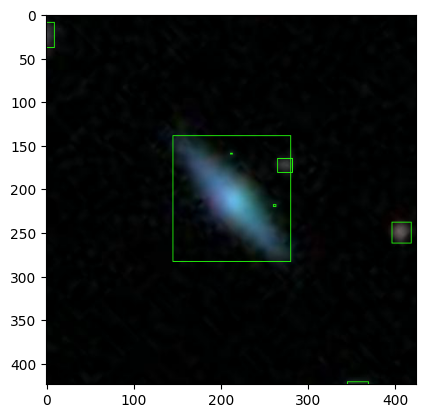

In [4]:
image = load_image(galaxies[1812])

image_bb = find_bounding_boxes(image, 30)
plt.imshow(image_bb)
plt.show()

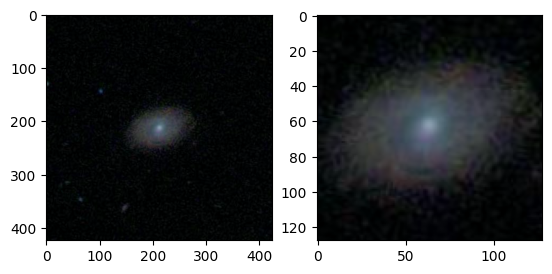

In [46]:
image = load_image(galaxies[random.randint(0, len(galaxies) - 1)])
plt.subplot(1, 2, 1)
plt.imshow(image)

image_cropped = extract_and_resize(image, 20)
plt.subplot(1, 2, 2)
plt.imshow(image_cropped)
plt.show()

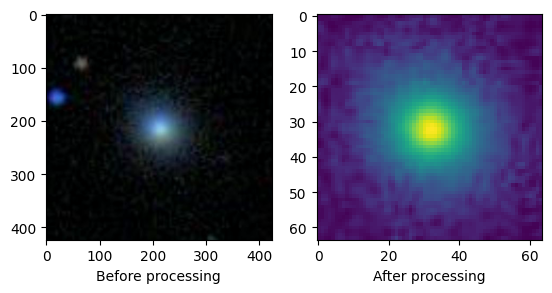

In [149]:
random_galaxy = galaxies[random.randint(0, len(galaxies) - 1)]

image = cv.imread(random_galaxy)
plt.subplot(1, 2, 1)
plt.xlabel('Before processing')
plt.imshow(image)

processed_image = process_image(random_galaxy, 20, (64, 64))
plt.subplot(1, 2, 2)
plt.xlabel('After processing')
plt.imshow(processed_image)
plt.show()

In [5]:
encoder = Sequential()
encoder.add(Flatten(input_shape=[64, 64]))
encoder.add(Dense(500,activation="relu"))
encoder.add(Dense(400,activation="relu"))
encoder.add(Dense(300,activation="relu"))
encoder.add(Dense(200,activation="relu"))
encoder.add(Dense(100,activation="relu"))
encoder.add(Dense(50,activation="relu"))
encoder.add(Dense(25,activation="relu"))

/Users/michal/Documents/studia/sem4/WdUM/Galaxies_Clusterization/venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [151]:
print(encoder.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 500)            │     2,048,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 400)            │       200,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 300)            │       120,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 200)            │        60,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 25)             │         1,275 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,455,825 (9.37 MB)

 Trainable params: 2,455,825 (9.37 MB)

 Non-trainable params: 0 (0.00 B)

None


In [6]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation="relu"))
decoder.add(Dense(100,activation="relu"))
decoder.add(Dense(200,activation="relu"))
decoder.add(Dense(300,activation="relu"))
decoder.add(Dense(400,activation="relu"))
decoder.add(Dense(500,activation="relu"))
decoder.add(Dense(4096, activation="sigmoid"))
decoder.add(Reshape([64, 64]))

/Users/michal/Documents/studia/sem4/WdUM/Galaxies_Clusterization/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [153]:
print(decoder.summary())

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 50)             │         1,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 100)            │         5,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 200)            │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 300)            │        60,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 400)            │       120,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 500)            │       200,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 4096)           │     2,052,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 64, 64)         │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,459,896 (9.38 MB)

 Trainable params: 2,459,896 (9.38 MB)

 Non-trainable params: 0 (0.00 B)

None


In [7]:
AutoEncoder = Sequential([encoder, decoder])

In [8]:
print(AutoEncoder.summary())

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ ?                      │     2,455,825 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ ?                      │     2,459,896 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,915,721 (18.75 MB)

 Trainable params: 4,915,721 (18.75 MB)

 Non-trainable params: 0 (0.00 B)

None


In [9]:
processed_images_train = []

for galaxy in galaxies_train:
    image = process_image(galaxy, 30, target_size=(64, 64))
    processed_images_train.append(image)

X_train = np.array(processed_images_train)

In [10]:
processed_images_val = []

for galaxy in galaxies_val:
    image = process_image(galaxy, 30, target_size=(64, 64))
    processed_images_val.append(image)

X_val = np.array(processed_images_val)

In [11]:
AutoEncoder.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

In [13]:
AutoEncoder.fit(X_train, X_train, validation_data=(X_val, X_val), epochs=10)

Epoch 1/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 39s 19ms/step - accuracy: 0.0849 - loss: 0.3876 - val_accuracy: 0.0847 - val_loss: 0.3862
Epoch 2/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 38s 19ms/step - accuracy: 0.0849 - loss: 0.3868 - val_accuracy: 0.0845 - val_loss: 0.3864
Epoch 3/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 39s 20ms/step - accuracy: 0.0845 - loss: 0.3866 - val_accuracy: 0.0830 - val_loss: 0.3862
Epoch 4/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 39s 20ms/step - accuracy: 0.0837 - loss: 0.3864 - val_accuracy: 0.0841 - val_loss: 0.3844
Epoch 5/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 39s 20ms/step - accuracy: 0.0854 - loss: 0.3846 - val_accuracy: 0.0895 - val_loss: 0.3834
Epoch 6/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.0906 - loss: 0.3830 - val_accuracy: 0.0951 - val_loss: 0.3817
Epoch 7/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.0948 - loss: 0.3819 - val_accuracy: 0.1010 - val_loss: 0.3802
Epoch 8/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.1019 -

In [20]:
predicitions = AutoEncoder.predict(X_val[:100])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


Before
After Auto Encoder


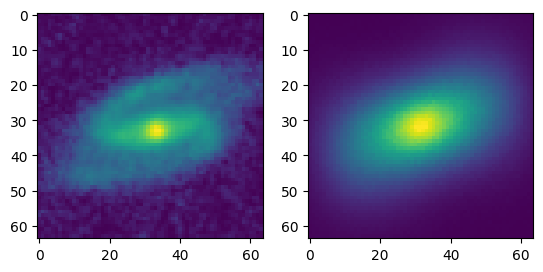

In [91]:
index = random.randint(0, len(predicitions) - 1)

print("Before")
plt.subplot(1, 2, 1)
plt.imshow(X_val[index])

print("After Auto Encoder")
plt.subplot(1, 2, 2)
plt.imshow(predicitions[index])
plt.show()

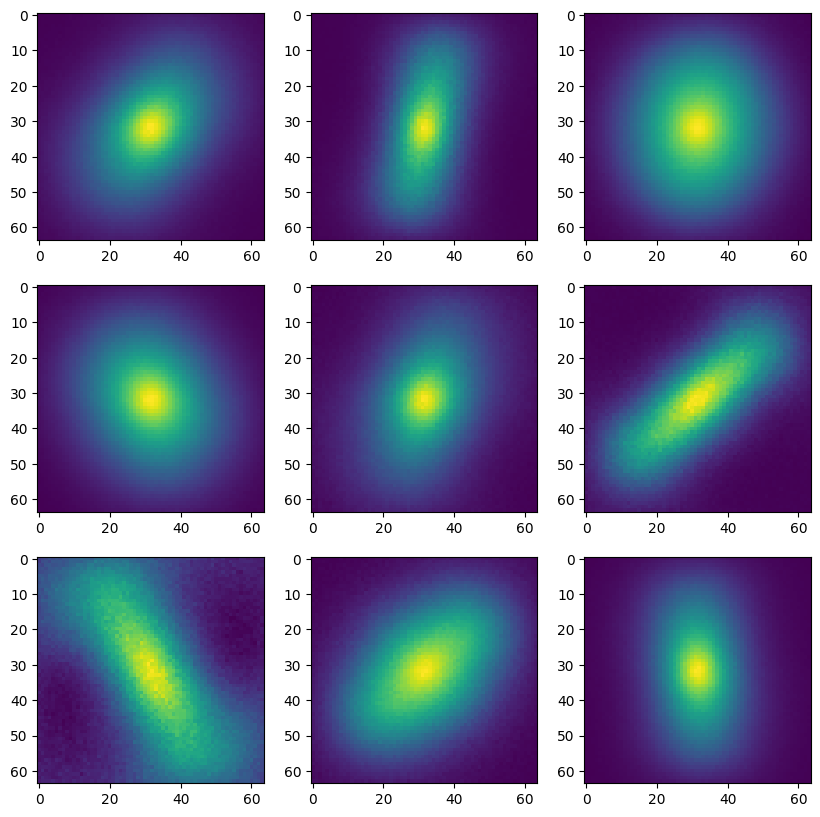

In [19]:
figure, axis = plt.subplots(nrows=3,ncols=3,figsize=(10,10))

for index, ax in enumerate(axis.flat):
    ax.imshow(predicitions[index])